Metrics:
- Sensitivity (Recall) - What % of real events got detected? $\frac{TP}{TP+FN}$
- Specificity - What % of no events got detected? $\frac{TN}{TN+FP}$
- Precision - What % of predicted events where real events? $\frac{TP}{TP+FP}$

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
scores = ['precision', 'recall', 'f1']
data = pd.read_csv('55_analyse_correctify_size.csv')

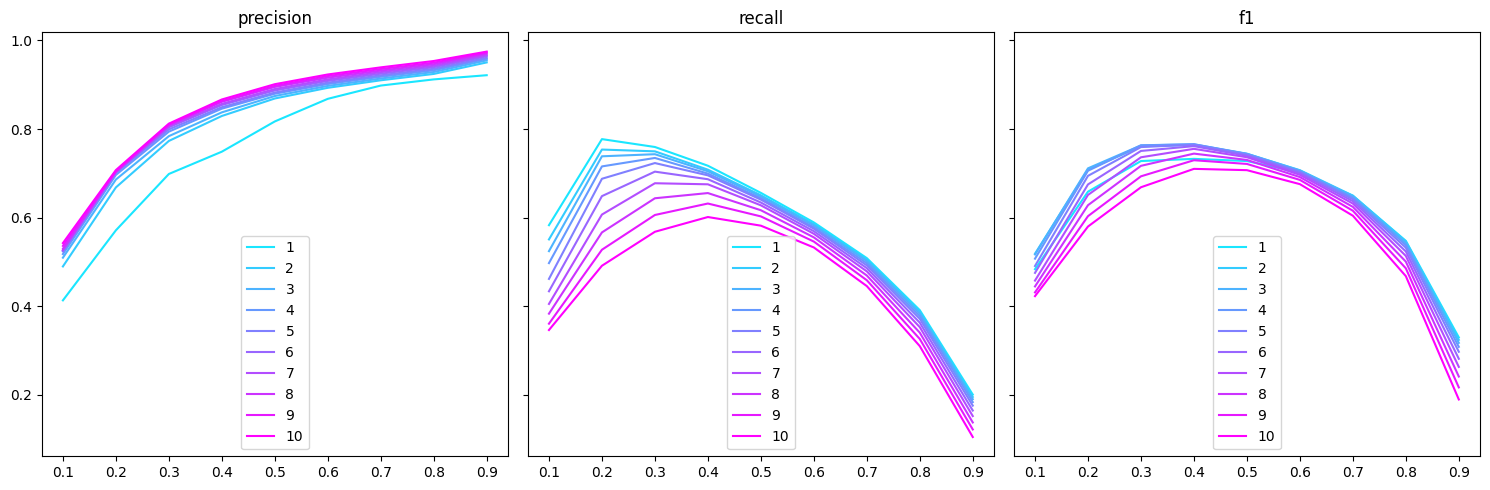

In [3]:
_, axs = plt.subplots(1, len(scores), figsize=(len(scores)*5, 5), sharex=True, sharey=True)
for i, score in enumerate(scores):
    axs[i].set_title(score)
    for cor_size in range(1, 11):
        values = data[data['cor_size'] == cor_size].set_index('thr')[score]
        axs[i].plot(list(values.index), list(values), label=cor_size, color=(cor_size/10, 1-cor_size/10, 1))
    axs[i].legend(loc='lower center')
plt.tight_layout()

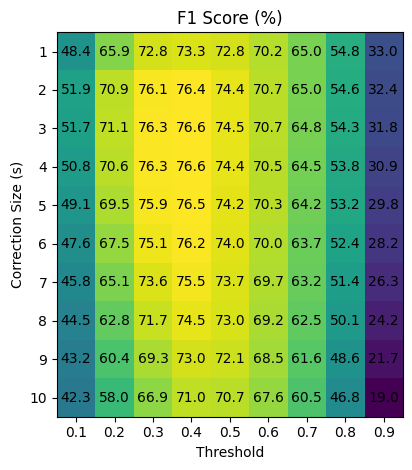

In [ ]:
cor_sizes = list(range(1, 11))
thrs = [i/10 for i in range(1, 10)]
f1_scores = np.array([[data[(data['thr'] == thr) & (data['cor_size'] == cor_size)].iloc[0]['f1'] for thr in thrs] for cor_size in cor_sizes])

_, ax = plt.subplots()
ax.imshow(f1_scores)

ax.set_xticks(range(len(thrs)), labels=thrs)
ax.set_yticks(range(len(cor_sizes)), labels=cor_sizes)

for i in range(len(cor_sizes)):
    for j in range(len(thrs)):
        text = ax.text(j, i, round(f1_scores[i, j]*100, 1), ha='center', va='center', color='k')

ax.set_title('F1 Score (%)')
ax.set_ylabel('Correction Size (s)')
ax.set_xlabel('Threshold')

plt.tight_layout()
plt.show()

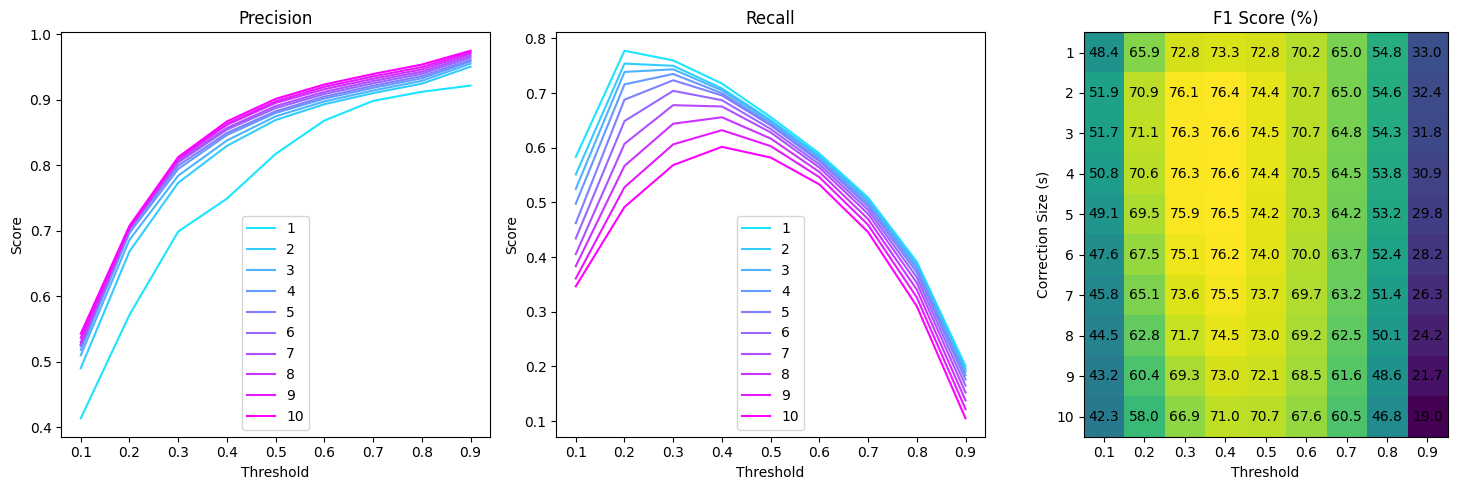

<Figure size 640x480 with 0 Axes>

In [9]:
scores = ['precision', 'recall', 'f1']
_, axs = plt.subplots(1, len(scores), figsize=(len(scores)*5, 5))
for i, score in enumerate(scores[:2]):
    for cor_size in range(1, 11):
        values = data[data['cor_size'] == cor_size].set_index('thr')[score]
        axs[i].plot(list(values.index), list(values), label=cor_size, color=(cor_size/10, 1-cor_size/10, 1))
    axs[i].legend(loc='lower center')
    axs[i].set_xlabel('Threshold')
    axs[i].set_ylabel('Score')
    axs[i].set_title(['Precision', 'Recall'][i])


cor_sizes = list(range(1, 11))
thrs = [i/10 for i in range(1, 10)]
f1_scores = np.array([[data[(data['thr'] == thr) & (data['cor_size'] == cor_size)].iloc[0]['f1'] for thr in thrs] for cor_size in cor_sizes])

ax = axs[2]
ax.imshow(f1_scores)

ax.set_xticks(range(len(thrs)), labels=thrs)
ax.set_yticks(range(len(cor_sizes)), labels=cor_sizes)

for i in range(len(cor_sizes)):
    for j in range(len(thrs)):
        text = ax.text(j, i, round(f1_scores[i, j]*100, 1), ha='center', va='center', color='k')

ax.set_title('F1 Score (%)')
ax.set_ylabel('Correction Size (s)')
ax.set_xlabel('Threshold')

plt.tight_layout()
plt.show()


plt.tight_layout()